<a href="https://colab.research.google.com/github/aviralhub/URL_website_detection/blob/main/MnistProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

IMPORT THE LIBRARIES

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Dropout, Flatten, Dense
from tensorflow.keras.initializers import HeNormal
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Dropout
from sklearn.model_selection import StratifiedKFold
import numpy as np

In [ ]:
# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalize the pixel values to a range of [0, 1]
x_train, x_test = x_train / 255.0, x_test / 255.0

# Reshape the data to include a single color channel (grayscale)
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28, 1)
(60000,)
(10000, 28, 28, 1)
(10000,)


VISUALIZE THE DATA

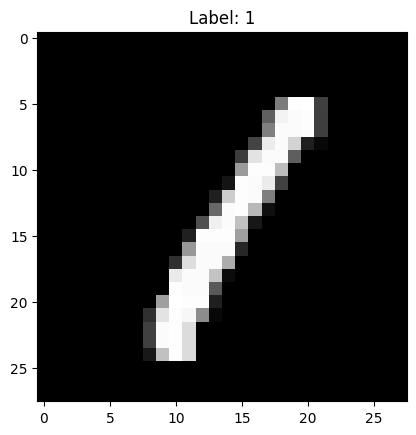

In [ ]:
import matplotlib.pyplot as plt

# Display the first image in the training set
plt.imshow(x_train[3].reshape(28, 28), cmap='gray')  # Reshape to 28x28 and show in grayscale
plt.title(f"Label: {y_train[3]}")  # Display the label of the image
plt.show()

MODEL

In [ ]:
he_normal = HeNormal()

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', kernel_initializer=he_normal, input_shape=(28, 28, 1)),
    Conv2D(64, (3, 3), activation='relu', kernel_initializer=he_normal),
    MaxPooling2D((2, 2)),

    Conv2D(64, (3, 3), activation='relu', kernel_initializer=he_normal),
    BatchNormalization(),
    Dropout(0.1),

    Conv2D(128, (3, 3), activation='relu', kernel_initializer=he_normal),
    BatchNormalization(),
    MaxPooling2D((2, 2)),

    Conv2D(256, (3, 3), activation='relu', kernel_initializer=he_normal),
    BatchNormalization(),
    Dropout(0.1),

    Flatten(),
    Dense(128, activation='relu', kernel_initializer=he_normal),
    Dense(64, activation='relu', kernel_initializer=he_normal),
    Dense(10, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 24, 24, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 10, 10, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 10, 10, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 10, 10, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 2, 2, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 2, 2, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 2, 2, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       131,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 566,666 (2.16 MB)

 Trainable params: 565,770 (2.16 MB)

 Non-trainable params: 896 (3.50 KB)

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Dropout, Flatten, Dense
from tensorflow.keras.initializers import HeNormal
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Dropout
from sklearn.model_selection import StratifiedKFold
import numpy as np

# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0  # Normalize
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

num_folds = 7
skf = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)
k_fold_accuracies = []

for fold, (train_idx, val_idx) in enumerate(skf.split(x_train, y_train)):
    print(f"\nTraining Fold {fold+1}/{num_folds}...")

    x_train_fold, x_val_fold = x_train[train_idx], x_train[val_idx]
    y_train_fold, y_val_fold = y_train[train_idx], y_train[val_idx]

    he_normal = HeNormal()

    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', kernel_initializer=he_normal, input_shape=(28, 28, 1)),
        Conv2D(64, (3, 3), activation='relu', kernel_initializer=he_normal),
        MaxPooling2D((2, 2)),

        Conv2D(64, (3, 3), activation='relu', kernel_initializer=he_normal),
        BatchNormalization(),
        Dropout(0.1),

        Conv2D(128, (3, 3), activation='relu', kernel_initializer=he_normal),
        BatchNormalization(),
        MaxPooling2D((2, 2)),

        Conv2D(256, (3, 3), activation='relu', kernel_initializer=he_normal),
        BatchNormalization(),
        Dropout(0.1),

        Flatten(),
        Dense(128, activation='relu', kernel_initializer=he_normal),
        Dense(64, activation='relu', kernel_initializer=he_normal),
        Dense(10, activation='softmax')
    ])

    model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

    early_stopping = tf.keras.callbacks.EarlyStopping(patience=3, min_delta=0.01, restore_best_weights=True)

    history = model.fit(x_train_fold, y_train_fold, epochs=10, batch_size=32,
                        validation_data=(x_val_fold, y_val_fold), callbacks=[early_stopping])

    val_loss, val_acc = model.evaluate(x_val_fold, y_val_fold)
    k_fold_accuracies.append(val_acc)
    print(f"Fold {fold+1} Accuracy: {val_acc:.4f}")

print(f"\nFinal K-Fold Accuracy: {np.mean(k_fold_accuracies):.4f} ± {np.std(k_fold_accuracies):.4f}")


Training Fold 1/7...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1608/1608 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 0.9290 - loss: 0.2315 - val_accuracy: 0.9830 - val_loss: 0.0607
Epoch 2/10
1608/1608 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9844 - loss: 0.0540 - val_accuracy: 0.9798 - val_loss: 0.0789
Epoch 3/10
1608/1608 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9864 - loss: 0.0456 - val_accuracy: 0.9847 - val_loss: 0.0545
Epoch 4/10
1608/1608 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9887 - loss: 0.0358 - val_accuracy: 0.9857 - val_loss: 0.0561
268/268 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9820 - loss: 0.0584
Fold 1 Accuracy: 0.9830

Training Fold 2/7...
Epoch 1/10
1608/1608 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - accuracy: 0.9276 - loss: 0.2295 - val_accuracy: 0.9812 - val_loss: 0.0653
Epoch 2/10
1608/1608 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9835 - loss: 0.0568 - val_accuracy: 0.9704 - val_loss: 0.0996
Epoch 3/10
1608/1608 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9884 - loss: 0.0390 - val_acc

In [ ]:
import matplotlib.pyplot as plt

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13.5, 5))

# Plot training & validation loss
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(1, len(loss_train) + 1)
ax1.plot(epochs, loss_train, label='Training Loss')
ax1.plot(epochs, loss_val, label='Validation Loss')
ax1.set_title('Training and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.legend()

# Plot training & validation accuracy (categorical accuracy for MNIST)
acc_train = history.history['accuracy']  # Use 'accuracy' instead of 'binary_accuracy'
acc_val = history.history['val_accuracy']
epochs = range(1, len(acc_train) + 1)
ax2.plot(epochs, acc_train, label='Training Accuracy')
ax2.plot(epochs, acc_val, label='Validation Accuracy')
ax2.set_title('Training and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.legend()

# Print best validation loss and accuracy
print("Best Validation Loss: ", min(history.history['val_loss']))
print("Best Validation Accuracy: ", max(history.history['val_accuracy']))

plt.show()

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score

# Get model predictions
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert probabilities to class labels

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)

# Compute precision, recall (sensitivity), and F1 score for each class
report = classification_report(y_test, y_pred_classes, output_dict=True)

# Extract overall precision, recall (macro/micro averages), and F1 score
overall_precision = precision_score(y_test, y_pred_classes, average='macro')  # Macro: unweighted mean
overall_recall = recall_score(y_test, y_pred_classes, average='macro')  # Macro recall
overall_f1 = f1_score(y_test, y_pred_classes, average='macro')  # Macro F1 score

# Compute TP, FP, FN, TN, specificity, and FPR for each class
num_classes = cm.shape[0]
tp_fp_fn_tn = {}

TP,FP,FN,TN = 0,0,0,0

specificities = []
fprs = []
for class_label in range(num_classes):
    tp = cm[class_label, class_label]  # True Positives
    fp = np.sum(cm[:, class_label]) - tp  # False Positives
    fn = np.sum(cm[class_label, :]) - tp  # False Negatives
    tn = np.sum(cm) - (tp + fp + fn)  # True Negatives

    specificity = tn / (tn + fp) if (tn + fp) != 0 else 0  # Specificity
    fpr = fp / (fp + tn) if (fp + tn) != 0 else 0  # False Positive Rate
    specificities.append(specificity)
    fprs.append(fpr)

    TP+=tp
    FP+=fp
    FN+=fn
    TN+=tn

    tp_fp_fn_tn[class_label] = {
        "TP": tp, "FP": fp, "FN": fn, "TN": tn, "Specificity": specificity, "FPR": fpr
    }

# Overall specificity and FPR
overall_specificity = np.mean(specificities)
overall_fpr = np.mean(fprs)

# Overall accuracy
accuracy = np.sum(np.diag(cm)) / np.sum(cm)

# Print overall metrics
print(f"Overall Accuracy: {accuracy:.4f}")
print(f"Overall Precision: {overall_precision:.4f}")
print(f"Overall Recall (Sensitivity): {overall_recall:.4f}")
print(f"Overall F1 Score: {overall_f1:.4f}")
print(f"Overall Specificity: {overall_specificity:.4f}")
print(f"Overall FPR: {overall_fpr:.4f}")


# Print the full confusion matrix

print(f"TP: {TP}")
print(f"FP: {FP}")
print(f"FN: {FN}")
print(f"TN: {TN}")

In [ ]:
from keras.models import save_model
model.save('Mnist_10_model')